### Que pedo 

Primero hacemos la conexion a mongo

In [1]:
import pymongo
from pymongo import MongoClient

In [2]:
# Connect to MongoDB
client = MongoClient('mongodb://mongodb:27017/')
db = client['spotify']

# Collections
artists_collection = db['artists']
tracks_collection = db['tracks']

## Busquedas de los artistas

In [3]:
# 1. Find one artist document with specified fields
artist = artists_collection.find_one({}, {"name": 1, "popularity": 1, "followers.total": 1, "genres": 1, "_id": 0})
print("1. One artist document:", artist)

1. One artist document: {'followers': {'total': 1556507}, 'genres': ['album rock', 'classic rock', 'hard rock', 'heartland rock', 'mellow gold', 'progressive rock', 'rock', 'soft rock'], 'name': 'Kansas', 'popularity': 65}


In [4]:
# 2. Find all artists with popularity greater than 70, projecting specific fields
popular_artists = artists_collection.find(
    {"popularity": {"$gt": 70}},
    {"name": 1, "popularity": 1, "_id": 0}
)
print("artistas con popularidad mayor a 70")
for artist in popular_artists:
    print(artist)

artistas con popularidad mayor a 70
{'name': 'FISHER', 'popularity': 73}
{'name': 'Adele', 'popularity': 81}
{'name': 'John Mayer', 'popularity': 74}
{'name': 'DJ Khaled', 'popularity': 72}
{'name': 'Harry Styles', 'popularity': 82}
{'name': 'Dire Straits', 'popularity': 73}
{'name': 'Frank Sinatra', 'popularity': 74}
{'name': "Guns N' Roses", 'popularity': 77}
{'name': 'The Weeknd', 'popularity': 92}
{'name': 'Bizarrap', 'popularity': 82}
{'name': 'The Police', 'popularity': 74}
{'name': 'Hozier', 'popularity': 84}
{'name': 'Swedish House Mafia', 'popularity': 72}
{'name': 'Bad Bunny', 'popularity': 92}
{'name': 'Pink Floyd', 'popularity': 76}
{'name': 'Coldplay', 'popularity': 85}
{'name': 'Lil Peep', 'popularity': 80}
{'name': 'Led Zeppelin', 'popularity': 73}
{'name': 'Linkin Park', 'popularity': 83}
{'name': 'Tiësto', 'popularity': 83}
{'name': 'The Killers', 'popularity': 75}
{'name': 'The Rolling Stones', 'popularity': 77}
{'name': 'Tame Impala', 'popularity': 78}
{'name': 'Aven

In [5]:
# 3. Find artists belonging to the genre 'pop rap', projecting specific fields
pop_rap_artists = artists_collection.find(
    {"genres": "pop rap"},
    {"name": 1, "genres": 1, "_id": 0}
)
print("3. Artists with genre 'pop rap':")
for artist in pop_rap_artists:
    print(artist)

3. Artists with genre 'pop rap':
{'genres': ['hip hop', 'miami hip hop', 'pop rap', 'rap'], 'name': 'DJ Khaled'}
{'genres': ['detroit hip hop', 'gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap'], 'name': 'The Game'}
{'genres': ['dance pop', 'pop', 'pop rap'], 'name': 'Black Eyed Peas'}
{'genres': ['atl hip hop', 'dirty south rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap'], 'name': 'Gucci Mane'}
{'genres': ['hip hop', 'ohio hip hop', 'pop rap', 'rap'], 'name': 'Kid Cudi'}
{'genres': ['east coast hip hop', 'gangster rap', 'hip hop', 'pop rap', 'queens hip hop', 'rap'], 'name': '50 Cent'}
{'genres': ['pop rap', 'seattle hip hop'], 'name': 'Macklemore'}
{'genres': ['atl hip hop', 'dirty south rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap'], 'name': 'Gucci Mane'}
{'genres': ['detroit hip hop', 'gangster rap', 'hip hop', 'pop rap', 'rap', 'southern hip hop', 'trap'], 'name': 'The Game'}
{'genres': ['hip hop', 'ohio hip hop', 'pop rap', 'rap

In [6]:
# 4. Find artists with more than 1 million followers, projecting specific fields
million_followers_artists = artists_collection.find(
    {"followers.total": {"$gt": 1000000}},
    {"name": 1, "followers.total": 1, "_id": 0}
)
print("4. Artists with more than 1 million followers:")
for artist in million_followers_artists:
    print(artist)

4. Artists with more than 1 million followers:
{'followers': {'total': 1556507}, 'name': 'Kansas'}
{'followers': {'total': 1040763}, 'name': 'The Pointer Sisters'}
{'followers': {'total': 1267404}, 'name': 'Men At Work'}
{'followers': {'total': 55496283}, 'name': 'Adele'}
{'followers': {'total': 5952898}, 'name': 'John Mayer'}
{'followers': {'total': 3747316}, 'name': 'Foster The People'}
{'followers': {'total': 1142646}, 'name': 'Surf Curse'}
{'followers': {'total': 11335386}, 'name': 'DJ Khaled'}
{'followers': {'total': 5979026}, 'name': 'Van Halen'}
{'followers': {'total': 32136405}, 'name': 'Harry Styles'}
{'followers': {'total': 7469919}, 'name': 'Dire Straits'}
{'followers': {'total': 2836964}, 'name': 'Emmanuel'}
{'followers': {'total': 2290980}, 'name': 'Rush'}
{'followers': {'total': 7139889}, 'name': 'Frank Sinatra'}
{'followers': {'total': 1961537}, 'name': 'Donna Summer'}
{'followers': {'total': 30683237}, 'name': "Guns N' Roses"}
{'followers': {'total': 8976837}, 'name': '

In [7]:
# 5. Count the number of artists in the collection
artist_count = artists_collection.count_documents({})
print("Numero total de artistas:", artist_count)

Numero total de artistas: 726


## Busquedas de canciones

In [8]:
# 1. Find one track document with specified fields
track = tracks_collection.find_one({}, {"track_name": 1, "artist_name": 1, "album_name": 1, "_id": 0})
print("Como se ve un documento", track)

Como se ve un documento {'track_name': 'Comfortably Numb', 'artist_name': 'Pink Floyd', 'album_name': 'The Wall'}


In [9]:
# 2. Find all tracks by 'Pink Floyd'
pink_floyd_tracks = tracks_collection.find(
    {"artist_name": "Pink Floyd"},
    {"track_name": 1, "album_name": 1, "_id": 0}
)
print("Canciones de Pinkfloyd")
for track in pink_floyd_tracks:
    print(track)

Canciones de Pinkfloyd
{'track_name': 'Comfortably Numb', 'album_name': 'The Wall'}
{'track_name': 'Wish You Were Here', 'album_name': 'Wish You Were Here'}
{'track_name': 'Pigs (Three Different Ones)', 'album_name': 'Animals'}
{'track_name': 'Dogs', 'album_name': 'Animals'}
{'track_name': 'Another Brick in the Wall, Pt. 2', 'album_name': 'The Wall'}
{'track_name': 'Us and Them', 'album_name': 'The Dark Side of the Moon'}
{'track_name': 'Comfortably Numb', 'album_name': 'The Wall'}
{'track_name': 'Wish You Were Here', 'album_name': 'Wish You Were Here'}
{'track_name': 'Pigs (Three Different Ones)', 'album_name': 'Animals'}
{'track_name': 'Dogs', 'album_name': 'Animals'}
{'track_name': 'Another Brick in the Wall, Pt. 2', 'album_name': 'The Wall'}
{'track_name': 'Us and Them', 'album_name': 'The Dark Side of the Moon'}


In [10]:
# 3. Find all tracks in the album 'The Wall', projecting specific fields
the_wall_tracks = tracks_collection.find(
    {"album_name": "The Wall"},
    {"track_name": 1, "artist_name": 1, "_id": 0}
)
print("Canciones que esten en el album The Wall")
for track in the_wall_tracks:
    print(track)

Canciones que esten en el album The Wall
{'track_name': 'Comfortably Numb', 'artist_name': 'Pink Floyd'}
{'track_name': 'Another Brick in the Wall, Pt. 2', 'artist_name': 'Pink Floyd'}
{'track_name': 'Comfortably Numb', 'artist_name': 'Pink Floyd'}
{'track_name': 'Another Brick in the Wall, Pt. 2', 'artist_name': 'Pink Floyd'}


In [11]:
# 4. Count the number of tracks by 'Pink Floyd'
pink_floyd_track_count = tracks_collection.count_documents({"artist_name": "Pink Floyd"})
print("numero de canciones de Pink Floyd", pink_floyd_track_count)

numero de canciones de Pink Floyd 12


In [12]:
# 5. Find all tracks with track name containing 'Comfortably', projecting specific fields
comfortably_tracks = tracks_collection.find(
    {"track_name": {"$regex": "Comfortably"}},
    {"track_name": 1, "artist_name": 1, "album_name": 1, "_id": 0}
)
print("Canciones que contengan la palabra Comfortably")
for track in comfortably_tracks:
    print(track)

Canciones que contengan la palabra Comfortably
{'track_name': 'Comfortably Numb', 'artist_name': 'Pink Floyd', 'album_name': 'The Wall'}
{'track_name': 'Comfortably Numb', 'artist_name': 'Pink Floyd', 'album_name': 'The Wall'}


## Ahora vamos a ver algunas grafiquitas

In [13]:
import pymongo
from pymongo import MongoClient
import matplotlib.pyplot as plt

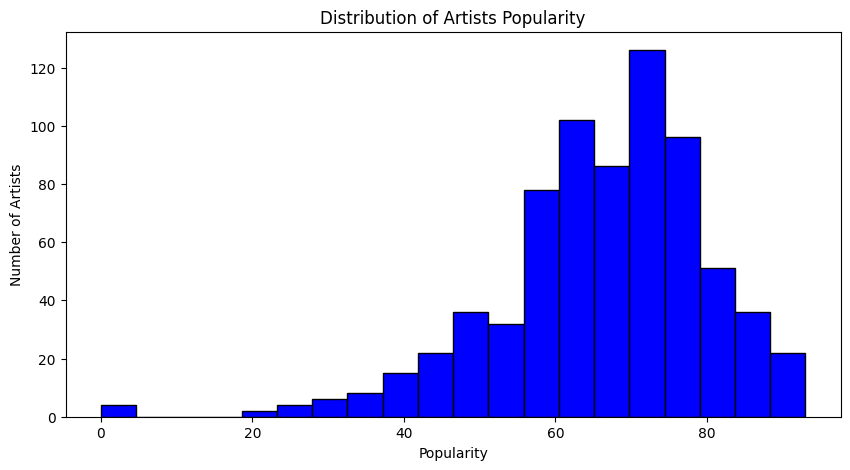

In [14]:
# Fetch data for the plots
artists_data = artists_collection.find({}, {"popularity": 1, "genres": 1, "_id": 0})
tracks_data = tracks_collection.find({}, {"artist_name": 1, "_id": 0})

# Prepare data for plotting
artist_popularity = []
genre_counts = {}

for artist in artists_data:
    artist_popularity.append(artist['popularity'])
    for genre in artist.get('genres', []):
        if genre not in genre_counts:
            genre_counts[genre] = 0
        genre_counts[genre] += 1

# Plot the distribution of artists' popularity
plt.figure(figsize=(10, 5))
plt.hist(artist_popularity, bins=20, color='blue', edgecolor='black')
plt.xlabel('Popularity')
plt.ylabel('Number of Artists')
plt.title('Distribution of Artists Popularity')
plt.show()

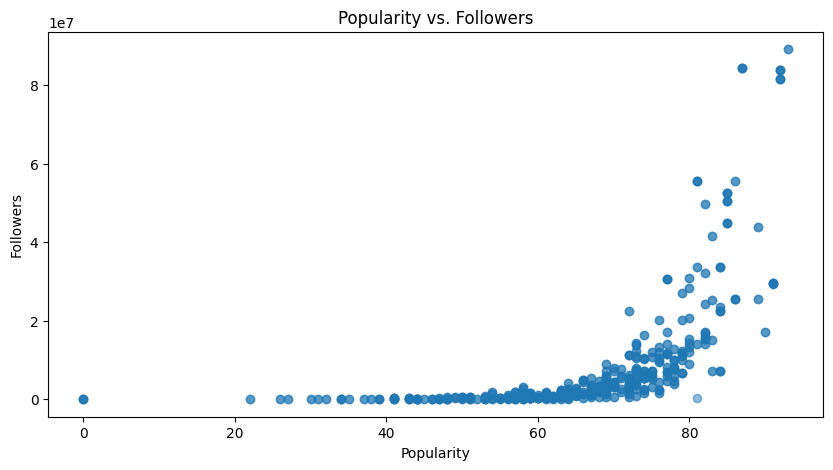

In [15]:
# Fetch data for the plots
artists_data = artists_collection.find({}, {"popularity": 1, "followers.total": 1, "genres": 1, "_id": 0})
tracks_data = tracks_collection.find({}, {"artist_name": 1, "_id": 0})

# Prepare data for plotting
artist_popularity = []
artist_followers = []
genre_counts = {}

for artist in artists_data:
    artist_popularity.append(artist['popularity'])
    artist_followers.append(artist['followers']['total'])
    for genre in artist.get('genres', []):
        if genre not in genre_counts:
            genre_counts[genre] = 0
        genre_counts[genre] += 1

# Scatter plot of popularity vs. followers
plt.figure(figsize=(10, 5))
plt.scatter(artist_popularity, artist_followers, alpha=0.5)
plt.xlabel('Popularity')
plt.ylabel('Followers')
plt.title('Popularity vs. Followers')
plt.show()